In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
wine = pd.read_csv('wine.data.csv',sep=',')
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


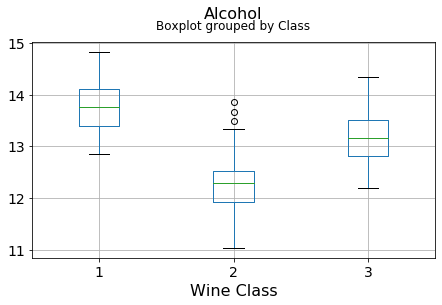

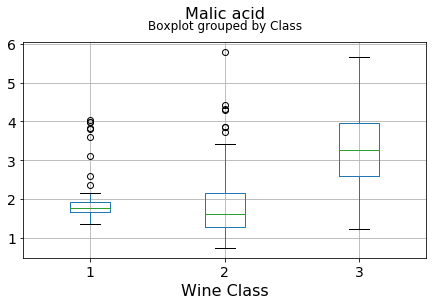

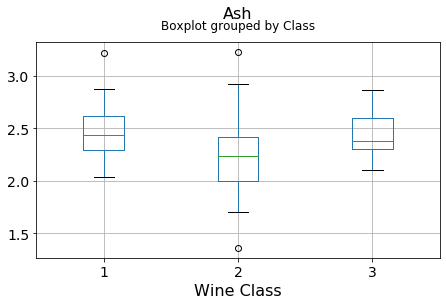

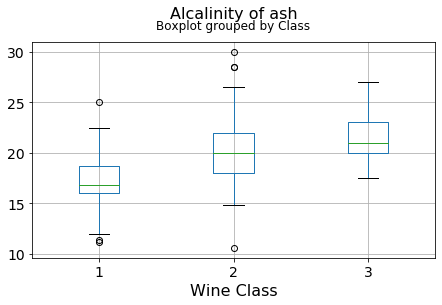

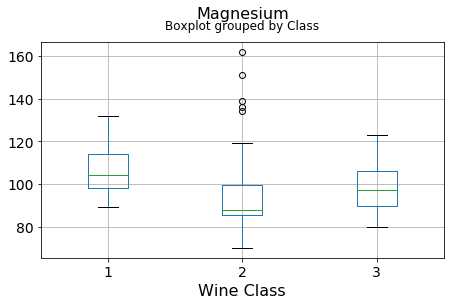

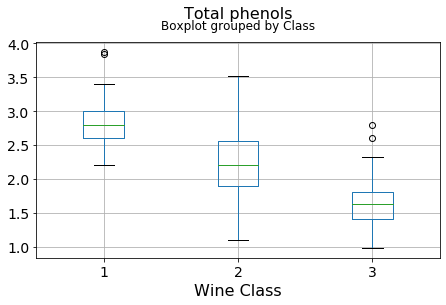

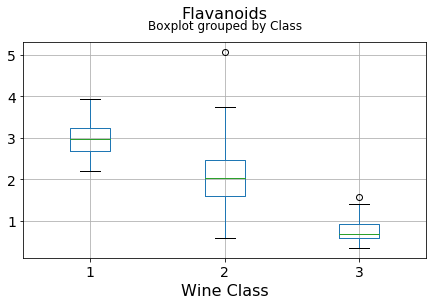

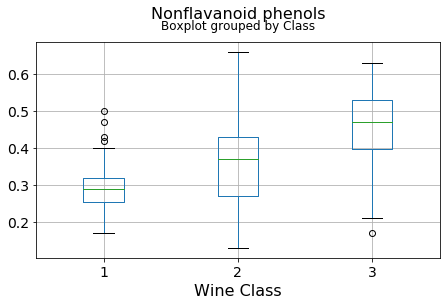

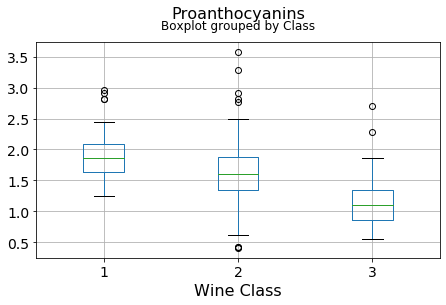

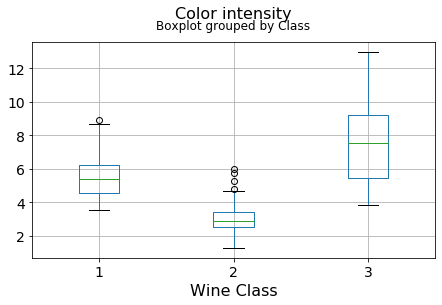

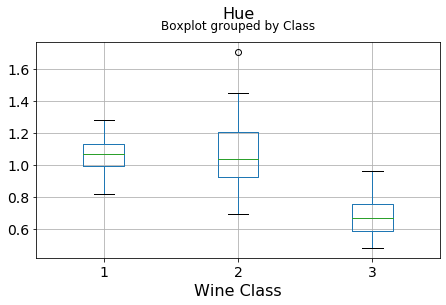

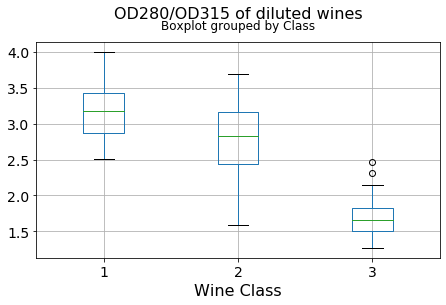

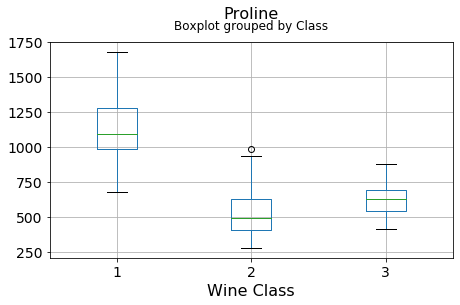

In [ ]:
for c in wine.columns[1:]:
    wine.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class",fontsize=16)

Text(0, 0.5, 'Flavanoids')

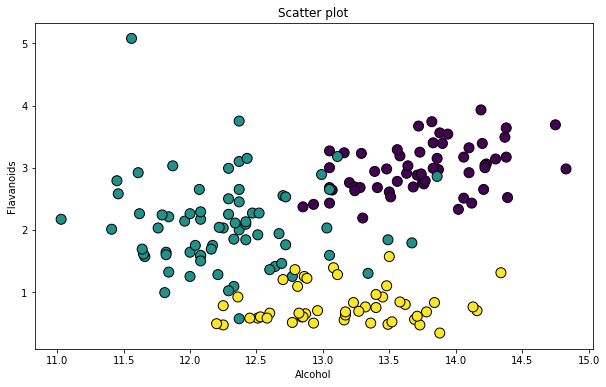

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(wine['Alcohol'],wine['Flavanoids'],c=wine['Class'],edgecolors='k',s=100)
plt.title("Scatter plot")
plt.xlabel("Alcohol")
plt.ylabel("Flavanoids")

In [ ]:
X = wine.drop(columns=['Class'])
Y = wine['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reglog = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [ ]:
reglog.fit(X_train,Y_train)

C:\Users\admin BASE\Anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_reglog = reglog.predict(X_test)
pred_reglog

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test, pred_reglog))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      0.88      0.90        16
           3       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.92        36
weighted avg       0.92      0.92      0.92        36



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nbc = GaussianNB()

In [ ]:
nbc.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
pred_nb = nbc.predict(X_test)

In [ ]:
pred_nb

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 1, 3, 2, 1, 1, 3, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [ ]:
print(classification_report(Y_test,pred_nb))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.81      0.90        16
           3       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36



## SVM Linear

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_lin = SVC(kernel='linear', C=9.9)

In [ ]:
svm_lin.fit(X_train,Y_train)

SVC(C=9.9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
pred_lin = svm_lin.predict(X_test)
pred_lin

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [ ]:
print(classification_report(Y_test, pred_lin))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.94      0.94      0.94        16
           3       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



## Sigmoid

In [ ]:
svm_sig=SVC(kernel='sigmoid',C=10)

In [ ]:
svm_sig.fit(X_train,Y_train)

C:\Users\admin BASE\Anaconda31\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
pred_sig=svm_sig.predict(X_test)
pred_sig

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [ ]:
print(classification_report(Y_test,pred_sig))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.44      1.00      0.62        16
           3       0.00      0.00      0.00         6

    accuracy                           0.44        36
   macro avg       0.15      0.33      0.21        36
weighted avg       0.20      0.44      0.27        36

